In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [3]:
df=pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [4]:
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-6-7ee7fe972bc2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [7]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [8]:
df.sample(5)

,Survived,Age,Fare
837,0,29.699118,8.0500
795,0,39.000000,13.0000
571,1,53.000000,51.4792
525,0,40.500000,7.7500
391,1,21.000000,7.7958


In [11]:
X=df.iloc[:, 1:3]
y=df.iloc[:, 0]

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape

((712, 2), (179, 2))

<ipython-input-17-3ddb4e2a2814>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


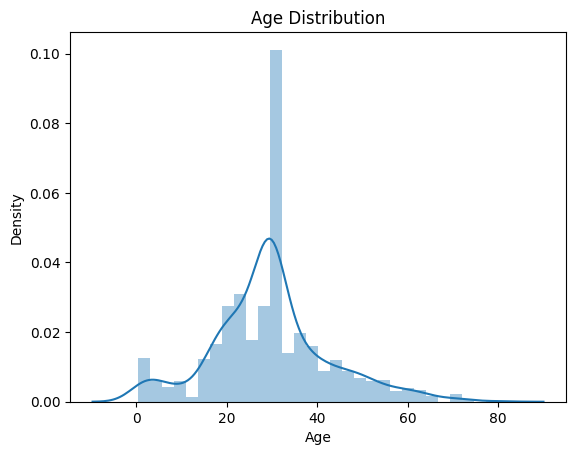

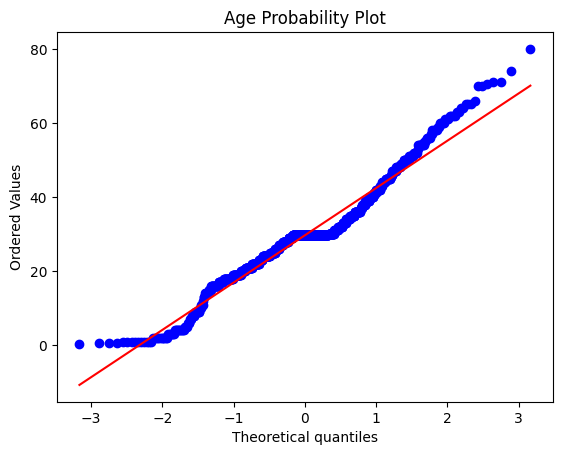

In [17]:
sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.show()

stats.probplot(df['Age'], dist='norm', plot=plt)
plt.title('Age Probability Plot')
plt.show()

<ipython-input-18-1f41d4b3a0f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


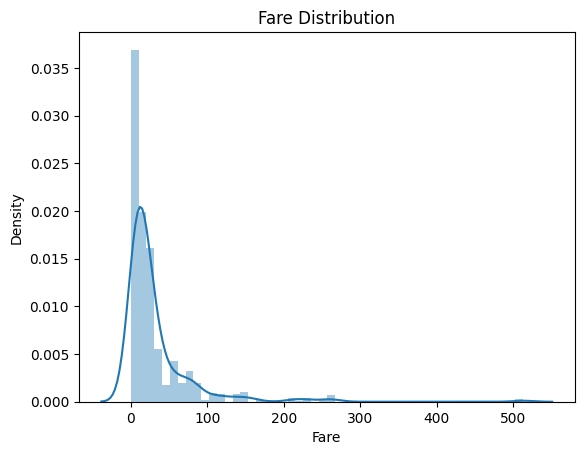

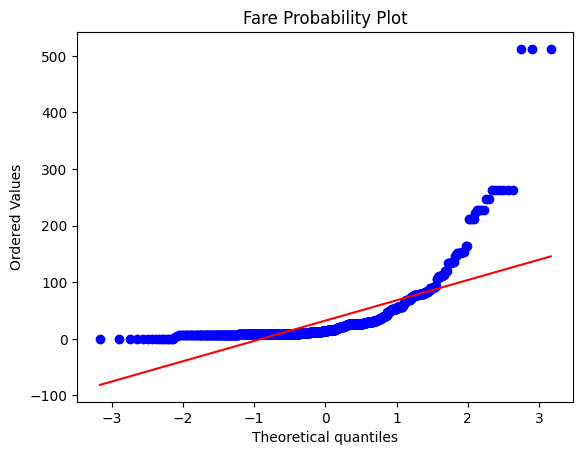

In [18]:
sns.distplot(df['Fare'])
plt.title("Fare Distribution")
plt.show()

stats.probplot(df['Fare'], dist='norm', plot=plt)
plt.title('Fare Probability Plot')
plt.show()

In [20]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [21]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_predict_logistic=clf.predict(X_test)
y_predict_tree=clf2.predict(X_test)

In [26]:
accuracy=accuracy_score(y_test, y_predict_logistic)
accuracy1=accuracy_score(y_test, y_predict_tree)

In [27]:
accuracy, accuracy1

(0.6480446927374302, 0.664804469273743)

In [28]:
trf1=FunctionTransformer(np.log1p)
trf2=FunctionTransformer(np.square)

In [34]:
X_train_transformed=trf1.fit_transform(X_train)
X_test_transformed=trf1.transform(X_test)

In [37]:
clf.fit(X_train_transformed, y_train)

LogisticRegression()

In [38]:
Y_predict=clf.predict((X_test))

In [39]:
accuracy_score(y_test, Y_predict)

0.7374301675977654

In [40]:
clf2.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [41]:
Y_predict_tree=clf2.predict(X_test)

In [42]:
accuracy_score(y_test, Y_predict_tree)

0.5865921787709497